In [7]:
def extract_energies(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    start_line = "          k = 0.0000 0.0000 0.0000"
    end_line = "occupation numbers"
    energies = []

    start_reading = False
    for line in lines:
        if end_line in line:
            start_reading = False
        if start_line in line:
            start_reading = True
            continue
        if start_reading:
            energies.extend([float(e) for e in line.split()])


    return energies

filename_qn1 = "2.Cu_vac_in_ZnS.scf.qn1.out"
energies_qn1 = extract_energies(filename_qn1)

filename_q0 = "2.Cu_vac_in_ZnS.scf.q0.out"
energies_q0 = extract_energies(filename_q0)

filename_qp1 = "2.Cu_vac_in_ZnS.scf.qp1.out"
energies_qp1 = extract_energies(filename_qp1)

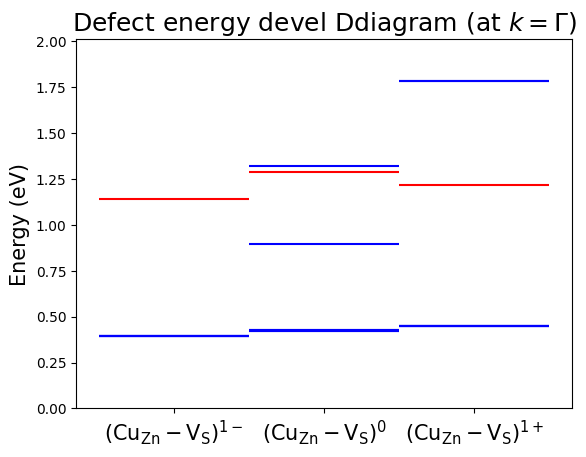

In [18]:
import matplotlib.pyplot as plt

vbm = 5.5452
gap = 2.01

def plot_energy_levels(energies, xmin, xmax, fermi):
    for energy in energies:
        plt.hlines(y=energy-vbm, xmin=xmin, xmax=xmax, color='b')
    plt.hlines(y=fermi-vbm, xmin=xmin, xmax=xmax, color='r')
    plt.ylabel('Energy (eV)', fontsize=15)
    plt.title(r'Defect energy devel Ddiagram (at $k=\Gamma$)', fontsize=18)
    #plt.ylim(5, 8)
    plt.ylim(0, gap)


plot_energy_levels(energies_qn1, 0, 1, 6.6858)
plot_energy_levels(energies_q0, 1, 2, 6.8337)
plot_energy_levels(energies_qp1, 2, 3, 6.7613)
plt.xticks([0.5, 1.5, 2.5], [r'$(\mathrm{Cu_{Zn}}-\mathrm{V_{S}})^{1-}$', r'$(\mathrm{Cu_{Zn}}-\mathrm{V_{S}})^{0}$', r'$(\mathrm{Cu_{Zn}}-\mathrm{V_{S}})^{1+}$'], fontsize=15)
plt.show()